## Helper functions

In [28]:
%load_ext autoreload
%autoreload 2

import clique_discovery 
from helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reducing Paths

{1.0: [['A', 'B', 'C', 'D', 'E']]}


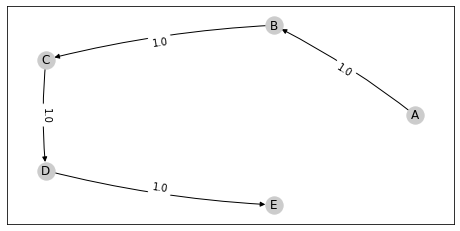

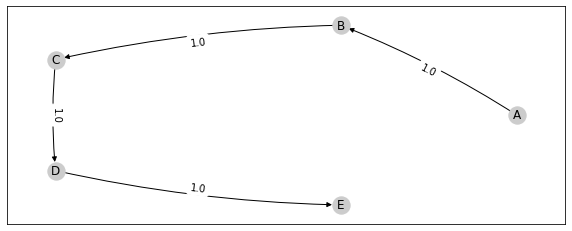

In [29]:
single_path = [ list("ABCDE") ]

inferred_paths = clique_discovery.infer_paths_from_traces( single_path )
nice_graph( inferred_paths )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )

{0.5: [['A', 'B', 'C'], ['1', '2', '3', '4']]}


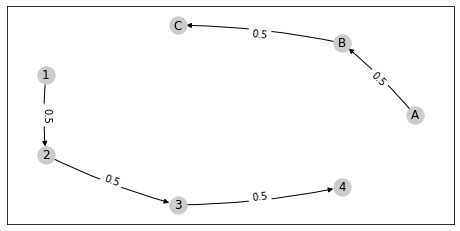

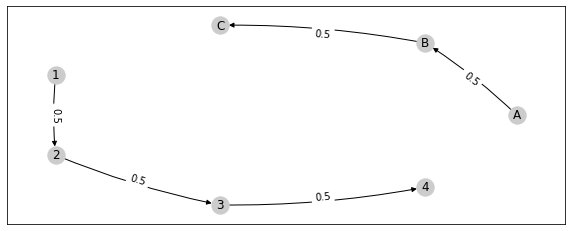

In [30]:
two_single_paths = [
    list("ABC"),
    list("1234")
]
inferred_paths = clique_discovery.infer_paths_from_traces( two_single_paths )
nice_graph( inferred_paths )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )

{0.9999999999999999: [['A', 'B', 'C', 'E', 'G']], 0.8333333333333333: [['A', 'D'], ['D', 'E'], ['B', 'D'], ['C', 'D'], ['D', 'G'], ['A', 'F'], ['E', 'F'], ['B', 'F'], ['C', 'F'], ['F', 'G']], 0.6666666666666666: [['D', 'F']]}


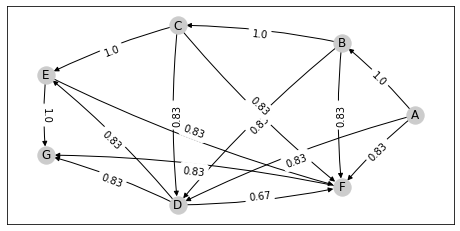

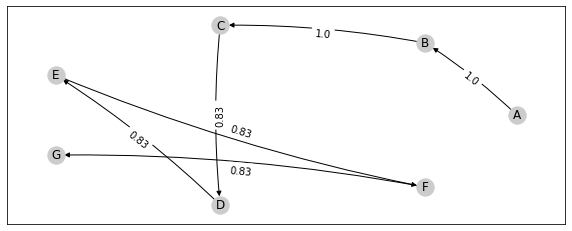

In [31]:
# With errors in the middle
truncated_trace = [
    list("ABCDEFG"),
    list("ABCDEG"),
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABCEFG"),
]
inferred_paths = clique_discovery.infer_paths_from_traces( truncated_trace)
nice_graph( inferred_paths )

untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )

{2.0: [['A', 'B', 'C']], 1.0: [['C', 'B', 'A']]}


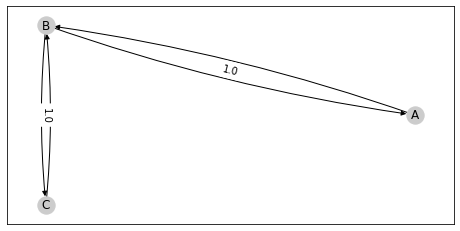

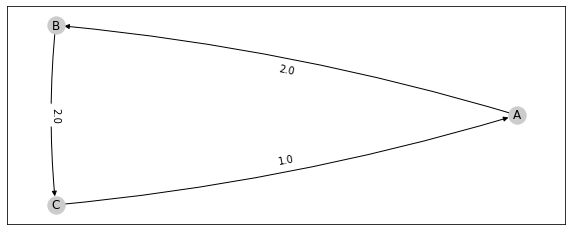

In [32]:
loop = [list("ABCABC")]
inferred_paths = clique_discovery.infer_paths_from_traces( loop )
nice_graph( inferred_paths )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )

{3.0: [['A', 'B', 'C', 'D']], 2.0: [['D', 'C', 'B', 'A']], 1.0: [['B', '1', '2', '3', '4'], ['A', '1', '2', '3', '4'], ['C', '1', '2', '3', '4'], ['D', '1', '2', '3', '4']]}


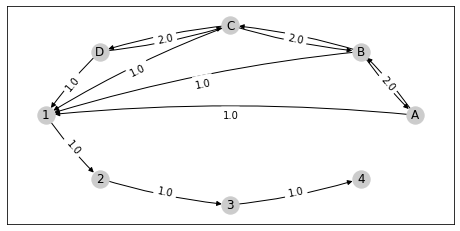

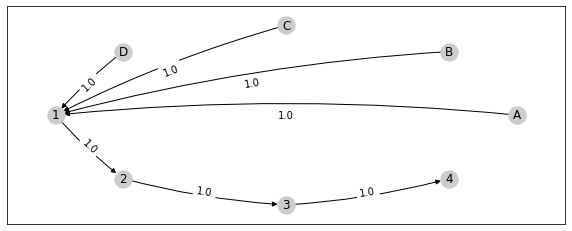

In [33]:
loop_with_tail = [
    list("ABCDABCDABCD1234"),
]
inferred_paths = clique_discovery.infer_paths_from_traces( loop_with_tail )
nice_graph( inferred_paths )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )

{3.0: [['1', 'A', 'B', 'C', 'D'], ['2', 'A', 'B', 'C', 'D']], 2.0: [['D', 'C', 'B', 'A']], 1.0: [['1', '2']]}


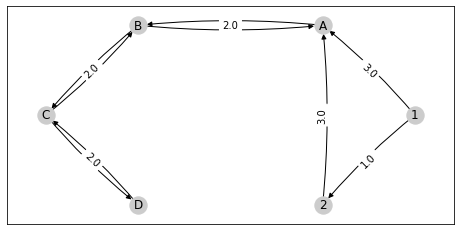

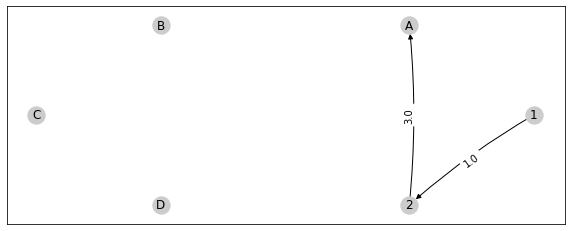

In [34]:
head_with_loop = [
    list("12ABCDABCDABCD"),
]
inferred_paths = clique_discovery.infer_paths_from_traces( head_with_loop )
nice_graph( inferred_paths )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )

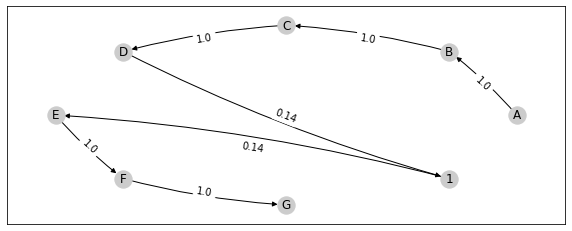

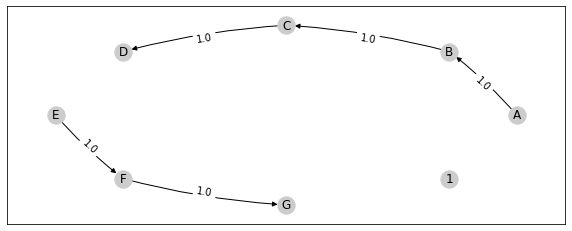

In [35]:
# With noise in the middle
noisy_trace = [
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABCDEFG"),
    list("ABCDEFG"),

    list("ABCD1EFG")
]
inferred_paths = clique_discovery.infer_paths_from_traces( noisy_trace )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )


G = clique_discovery.minimally_connected_graph( inferred_paths )
for u, v, frq in [ (u,v , round(G[u][v]['weight'], 2) ) for u,v in G.edges()]:
    if frq < 1/len(noisy_trace):
        G.remove_edge(u, v)

untangled_graph(G)

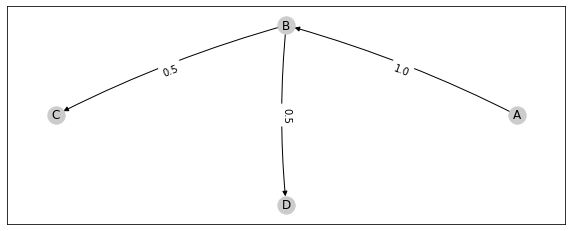

{1.0: [['A', 'B']], 0.5: [['B', 'C'], ['B', 'D'], ['A', 'C'], ['A', 'D']]}

In [36]:
tree_trace = [
    list("ABC"),
    list("ABD"),
]
inferred_paths = clique_discovery.infer_paths_from_traces( tree_trace )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )
inferred_paths

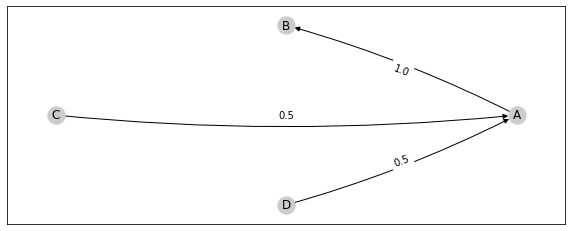

{1.0: [['A', 'B']], 0.5: [['C', 'B'], ['D', 'B'], ['C', 'A'], ['D', 'A']]}

In [37]:
join_trace = [
    list("CAB"),
    list("DAB"),
]
inferred_paths = clique_discovery.infer_paths_from_traces( join_trace )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )
inferred_paths

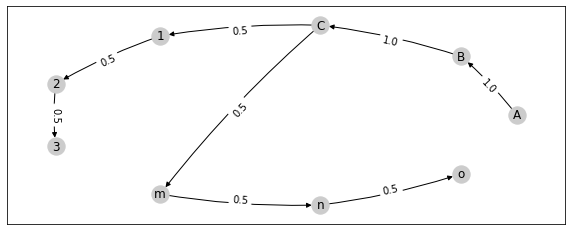

In [38]:
tree_trace = [
    list("ABCmno"),
    list("ABC123"),
]
inferred_paths = clique_discovery.infer_paths_from_traces( tree_trace )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )
# inferred_paths

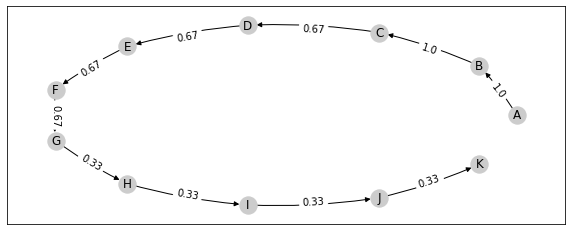

In [39]:
# Concatenation
concatenated_trace = [
    list("ABC"),
    list("ABCDEFG"),
    list("ABCDEFGHIJK"),
]
inferred_paths = clique_discovery.infer_paths_from_traces( concatenated_trace )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )
# inferred_paths

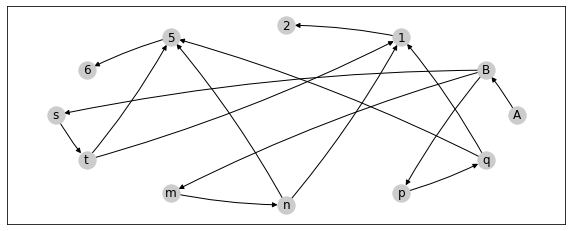

In [40]:
tree_trace = [
    list("ABmn12"),
    list("ABmn56"),
    list("ABpq12"),
    list("ABpq56"),
    list("ABst12"),
    list("ABst56"),
]
inferred_paths = clique_discovery.infer_paths_from_traces( tree_trace )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) , with_weigths=False )
# inferred_paths

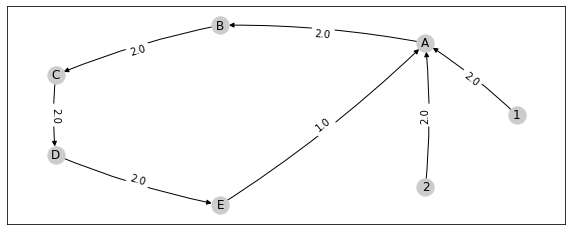

In [41]:
combined_loops = [
    list("1212ABCDEABCDE"),
    list("12ABCDEABCDE"),
]
inferred_paths = clique_discovery.infer_paths_from_traces( combined_loops )
# nice_graph( inferred_paths )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )
# inferred_paths

{1.5: [['B', 'c', 'd', 'e', 'f'], ['A', 'c', 'd', 'e', 'f'], ['X', 'c', 'd', 'e', 'f']], 1.25: [['1', 'c'], ['1', 'f'], ['1', 'd'], ['1', 'e'], ['2', 'c'], ['2', 'f'], ['2', 'd'], ['2', 'e']], 1.0: [['F', 'G']], 0.75: [['A', 'B', 'X', 'G'], ['f', 'e', 'd', 'c', 'G'], ['A', 'B', 'X', 'F'], ['f', 'e', 'd', 'c', 'F']], 0.5: [['h', 'j', 'k'], ['1', '2', 'A'], ['1', '2', 'F'], ['1', '2', 'B'], ['1', '2', 'X'], ['1', '2', 'G']], 0.25: [['k', 'j', 'h', 'G'], ['k', 'j', 'h', 'F'], ['3', '4', 'e'], ['3', '4', 'A'], ['3', '4', 'F'], ['3', '4', 'B'], ['3', '4', 'G'], ['3', '4', 'c'], ['3', '4', 'X'], ['3', '4', 'f'], ['3', '4', 'd']]}


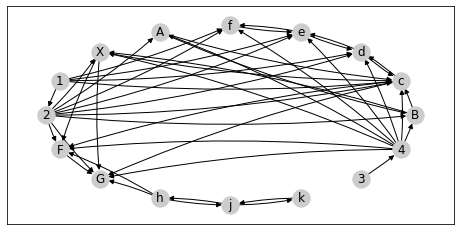

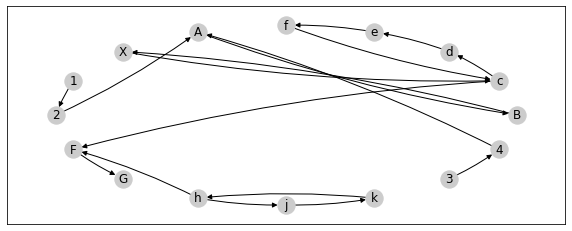

In [42]:
loop_inside = [
    list("12ABXcdefcdefFG"),
    list("12ABXcdefcdefcdefFG"),
    list("34ABXcdefFG"),
    list("hjkhjkFG")
]
inferred_paths = clique_discovery.infer_paths_from_traces( loop_inside )
nice_graph( inferred_paths, with_weigths=False )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ), with_weigths=False )
# inferred_paths

## Reduced and in Parallel (very hard)

The notion of parallelism in execution of the traces implies that there is no successor dependency between the threads. This can be achieved analitically in these two ways:

1. Analitically, by having a perfect interleave of each element in both set of traces to ensure that no artificial successors are considered
1. Heuristically, by creating sample traces conforming some construction parameters that amount of loops, trees, etc.

In [43]:
Interleave("ABC", "123")

['ABC123', 'AB1C23', 'AB12C3', 'AB123C', 'A1BC23', 'A1B2C3', 'A1B23C', 'A12BC3', 'A12B3C', 'A123BC', '1ABC23', '1AB2C3', '1AB23C', '1A2BC3', '1A2B3C', '1A23BC', '12ABC3', '12AB3C', '12A3BC', '123ABC']

{0.9999999999999999: [['A', 'B'], ['1', '2']], 0.8333333333333333: [['1', 'B'], ['A', '2']], 0.16666666666666666: [['B', '1'], ['2', 'A']]}


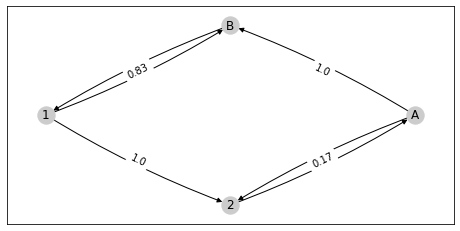

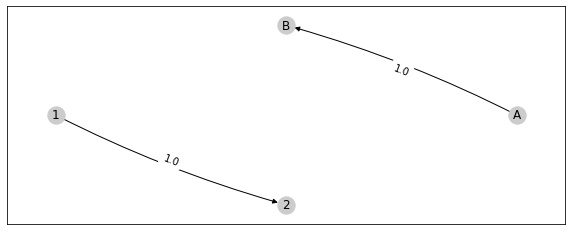

In [44]:
# Two Serials, perfectly interleaved, different size
interleaved_trace = [ list(x) for x in eval(str(Interleave("AB", "12"))) ]
inferred_paths = clique_discovery.infer_paths_from_traces( interleaved_trace )

nice_graph( inferred_paths )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )

# inferred_paths

{0.9999999999999999: [['A', 'B'], ['1', '2', '3']], 0.8999999999999999: [['1', 'B'], ['A', '3']], 0.7: [['2', 'B'], ['A', '2']], 0.6: [['B', '3'], ['1', 'A']], 0.4: [['3', 'B'], ['A', '1']], 0.30000000000000004: [['B', '2'], ['2', 'A']], 0.1: [['B', '1'], ['3', 'A']]}


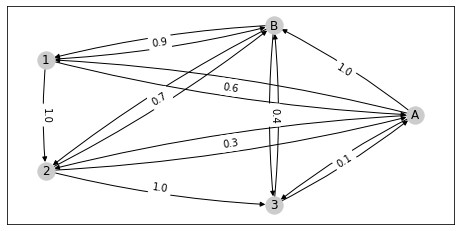

-------


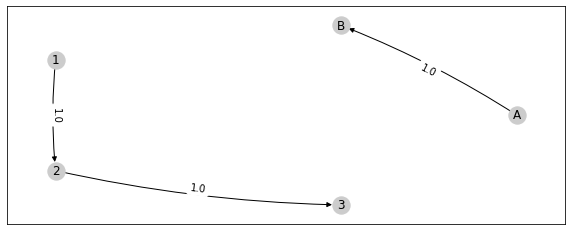

In [45]:
# Two Serials, perfectly interleaved, different size
interleaved_trace = [ list(x) for x in eval(str(Interleave("AB", "123"))) ]
inferred_paths = clique_discovery.infer_paths_from_traces( interleaved_trace )

nice_graph( inferred_paths )
print("-------")


untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )

# inferred_paths


In [46]:
G, loopweights = clique_discovery.remove_serial_cycles(G, G_bi)

NameError: name 'G_bi' is not defined

In [ ]:
# Gcomp = nx.complement(G_bi.to_undirected()) 
# nx.draw(Gcomp, with_labels=True, color="#DDDDDD")
# for u, v in Gcomp.edges:
#     if (u,v) in G.edges:
#         print (u, v, G.edges[u, v]["weight"])
#     elif (v, u) in G.edges:
#         print (v, u, G.edges[v, u]["weight"])
#     else:
#         print(u, v, "is an artifact")

In [ ]:
# for V in nx.algorithms.clique.find_cliques(Gcomp.to_undirected() ):
#     print (V)

In [ ]:
# Serial and loop, in parallel
interleaved_trace = [ list(x) for x in eval(str(Interleave("123123", "ABCD"))) ]
inferred_paths = clique_discovery.infer_paths_from_traces( interleaved_trace )

nice_graph( inferred_paths )
print("-------")

In [ ]:
G = clique_discovery.created_auxiliary_graph( inferred_paths )

for a in list("123"):
    for b in list("ABC"):
        try:
            print (a, b, G.edges[a, b]["weight"] / G.edges[b, a]["weight"])
            pass
        except:
            pass


untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )